# Data Science Decal, Fall 2017
## Day 3: Linear Regression

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

### NBA Salary Data

In [2]:
nba_sals = pd.read_csv("./nbasalary.csv", index_col = 0)
nba_sals = nba_sals.dropna(axis=0)
nba_sals.head()

,marr,wage,exper,age,educ,games,minutes,guard,forward,center,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
1,1,1.0025,4,27.0,4,77.0,2867.0,1,0,0.0,...,4.5,19.0,0,37.233765,2.305082,1,0,16,729.0,1
2,1,2.0300,5,28.0,4,78.0,2789.0,1,0,0.0,...,8.8,28.0,0,35.756409,3.010621,1,1,25,784.0,1
3,0,0.6500,1,25.0,4,74.0,1149.0,0,0,1.0,...,0.2,19.0,0,15.527027,1.871802,1,0,1,625.0,0
5,0,2.0300,5,28.0,4,47.0,1178.0,0,1,0.0,...,1.5,1.0,0,25.063829,3.010621,1,0,25,784.0,0
6,0,0.7550,3,24.0,4,82.0,2096.0,1,0,0.0,...,2.6,24.0,0,25.560976,2.021548,1,0,9,576.0,0


In [3]:
log_wage = nba_sals["lwage"]
wage = nba_sals["wage"]
points = nba_sals["points"]
exper = nba_sals["exper"]

### Simple Linear Regression

##### In this section, we will compare two SLR models and see which one performs better on a validation set. 
##### Model 1: Regressing wage on points scored
##### Model 2: Regressing wage on years of experience

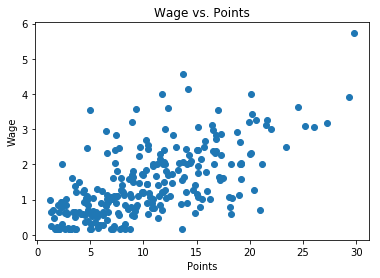

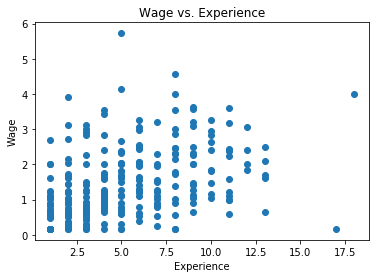

In [4]:
plt.figure(1)
plt.scatter(points,wage)
plt.title("Wage vs. Points")
plt.xlabel("Points")
plt.ylabel("Wage")
plt.show()
plt.close()

plt.figure(2)
plt.scatter(exper,wage)
plt.title("Wage vs. Experience")
plt.xlabel("Experience")
plt.ylabel("Wage")

plt.show()

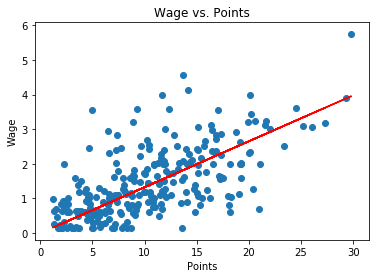

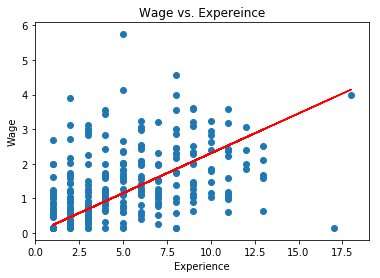

In [5]:
plt.figure(1)
myOLS_points = sm.OLS(wage,points).fit()
plt.plot(points, myOLS_points.predict(points), color = 'red')
plt.scatter(points, wage)
plt.title("Wage vs. Points")
plt.xlabel("Points")
plt.ylabel("Wage")
plt.show()
plt.close()

plt.figure(2)
myOLS_exper = sm.OLS(wage,exper).fit()
plt.plot(exper, myOLS_exper.predict(exper), color = 'red')
plt.scatter(exper, wage)
plt.title("Wage vs. Expereince")
plt.xlabel("Experience")
plt.ylabel("Wage")
plt.show()

#### A little validation...

In [6]:
wage_train = nba_sals["wage"][0:214]
wage_valid = nba_sals["wage"][214:]
points_train = nba_sals["points"][0:214]
points_valid = nba_sals["points"][214:]
exper_train = nba_sals["exper"][0:214]
exper_valid = nba_sals["exper"][214:]

#### Regression wage on points...

In [7]:
myOLS = sm.OLS(wage_train,points_train).fit()
wage_hat = myOLS.predict(points_valid)
mse = 1/len(wage_valid)*np.dot((wage_valid - wage_hat),(wage_valid - wage_hat))
print("The MSE for the model wage~points is:", mse)

The MSE for the model wage~points is: 0.448653457033


#### Regressing wage on experience...

In [8]:
myOLS = sm.OLS(wage_train,exper_train).fit()
wage_hat = myOLS.predict(exper_valid)
mse = 1/len(wage_valid)*np.dot((wage_valid - wage_hat),(wage_valid - wage_hat))
print("The MSE for the model wage~experience is:", mse)

The MSE for the model wage~experience is: 0.551486838504


##### Conclusion: points scored is a better predictor of wage than years of experience

### Multiple Linear Regression

#### Wage vs. Experience & Points

In [10]:
exp_dat = nba_sals[["exper","points"]]
exp_dat = sm.add_constant(exp_dat)
myMLR = sm.OLS(wage, exp_dat).fit()
myMLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 19 Sep 2017   Prob (F-statistic):           1.71e-42
Time:                        18:21:19   Log-Likelihood:                -282.14
No. Observations:                 268   AIC:                             570.3
Df Residuals:                     265   BIC:                             581.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0537      0.099     -0.540      0.590        -0.249     0.142
exper          0.0866      0.013      6.786      0.000         0.061     0.112
points         0.1016      0.007     13.822      0.000         0.087     0.116
==============================================================================
Omnibus:                       38.136   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.078
Skew:                           0.794   Prob(JB):                     4.48e-15
Kurtosis:                       4.844   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

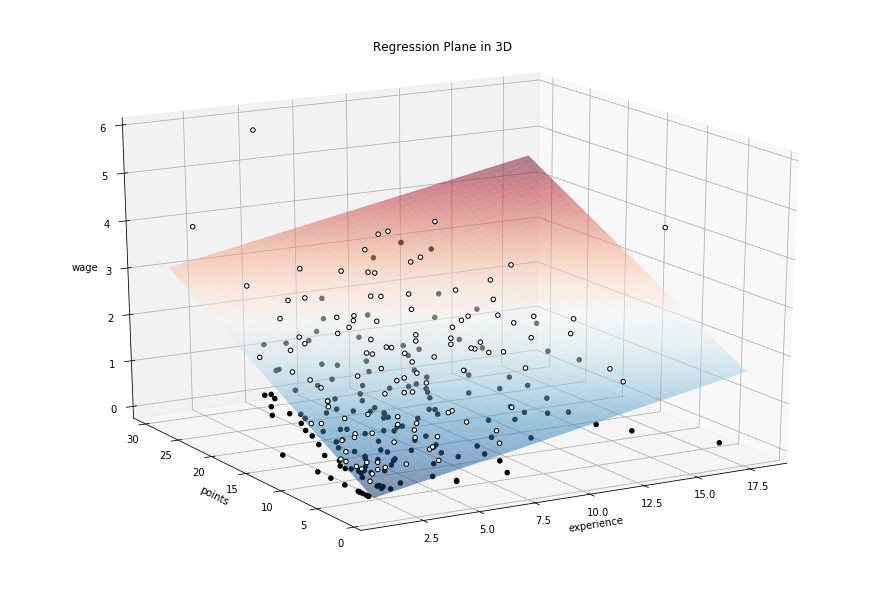

In [11]:
from mpl_toolkits.mplot3d import Axes3D

x1, x2 = np.meshgrid(np.linspace(exp_dat.exper.min(), exp_dat.exper.max(), 100), 
                       np.linspace(exp_dat.points.min(), exp_dat.points.max(), 100))

x3 = myMLR.params[0] + myMLR.params[1] * x1 + myMLR.params[2] * x2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
my3D = Axes3D(fig, azim=-120, elev=20)

# plot hyperplane
surf = my3D.plot_surface(x1, x2, x3, cmap=plt.cm.RdBu_r, alpha=0.5, linewidth=0.5)

# plot data points
resid = wage - myMLR.predict(exp_dat)
my3D.scatter(exp_dat[resid >= 0].exper, exp_dat[resid >= 0].points, wage[resid >= 0], color='black', alpha=1.0, facecolor='white')
my3D.scatter(exp_dat[resid < 0].exper, exp_dat[resid < 0].points, wage[resid < 0], color='black', alpha=1.0)

# set axis labels
my3D.set_xlabel('experience')
my3D.set_ylabel('points')
my3D.set_zlabel('wage')
my3D.set_title('Regression Plane in 3D')

plt.show()

### Residual Plots

#### Residuals vs. fitted values

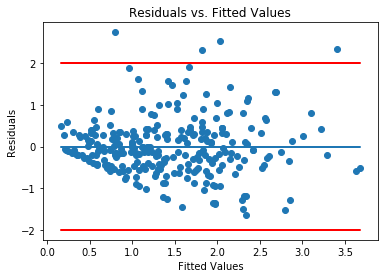

In [12]:
wage_hat = myMLR.predict(exp_dat)
resids = wage - wage_hat

# Line of best fit should be Y = 0
residOLS = sm.OLS(resids,wage_hat).fit()

# Residuals vs. fitted falues
plt.plot(wage_hat, residOLS.predict(wage_hat))
plt.scatter(wage_hat, resids)
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.title("Residuals vs. Fitted Values")
plt.plot(wage_hat, np.repeat(2,len(wage_hat)),color = "r")
plt.plot(wage_hat, np.repeat(-2,len(wage_hat)),color = "r")
plt.show()

#### Histogram of Residuals

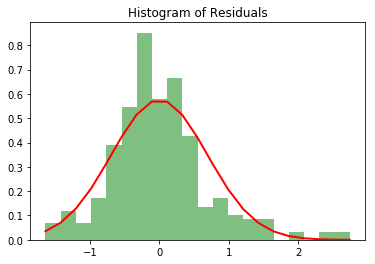

In [13]:
n, bins, patches = plt.hist(resids, bins = 20, normed= True, facecolor='green', alpha=0.5)

## pdf of a normal(0, std(resids))
y = mlab.normpdf( bins, np.mean(resids), np.std(resids))
l = plt.plot(bins, y, 'r', linewidth=2)
plt.title("Histogram of Residuals")
plt.show()

### Recursive Feature Elimination

##### From the API: "Feature ranking with recursive feature elimination and cross-validated selection of the best number of features."
##### "First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached."
##### RFECV performs RFE with a cross-validation loop

In [14]:
# Let's see what we have to work with...
nba_sals.columns

Index(['marr', 'wage', 'exper', 'age', 'educ', 'games', 'minutes', 'guard',
       'forward', 'center', 'points', 'rebounds', 'assists', 'draft',
       'allstar', 'avgmin', 'lwage', 'black', 'children', 'expersq', 'agesq',
       'marrblck'],
      dtype='object')

In [16]:
# Let's pick a subset
nba_dat = nba_sals[["exper", "games","minutes","forward","center","points","guard","age"]]
nba_dat = sm.add_constant(nba_dat)

In [17]:
myReg = LinearRegression()
myRFE = RFECV(myReg, step = 1, cv = 5)
myRFE = myRFE.fit(nba_dat[[1,2,3,4,5,6,7,8]], wage)

print(myRFE.support_)
print(myRFE.ranking_)

[ True False False False  True  True  True False]
[1 4 5 2 1 1 1 3]


#### Best model

In [18]:
myMLR2 = sm.OLS(wage, nba_dat[[0,1,5,6,7]]).fit()
myMLR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     81.85
Date:                Tue, 19 Sep 2017   Prob (F-statistic):           4.87e-45
Time:                        18:29:43   Log-Likelihood:                -271.04
No. Observations:                 268   AIC:                             552.1
Df Residuals:                     263   BIC:                             570.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0189      0.108     -0.175      0.861        -0.231     0.193
exper          0.0807      0.012      6.535      0.000         0.056     0.105
center         0.2897      0.119      2.438      0.015         0.056     0.524
points         0.1070      0.007     14.909      0.000         0.093     0.121
guard         -0.2611      0.090     -2.889      0.004        -0.439    -0.083
==============================================================================
Omnibus:                       23.800   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.186
Skew:                           0.556   Prob(JB):                     8.42e-09
Kurtosis:                       4.447   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's get the MSE of our best model...

In [19]:
# Split into training and validation sets
nba_sals_train = nba_dat[0:214]
nba_sals_valid = nba_dat[214:]

wage_train = nba_sals["wage"][0:214]
wage_valid = nba_sals["wage"][214:]

nba_dat_train = nba_sals_train[[0,1,5,6,7]]
nba_dat_train = sm.add_constant(nba_dat_train)

nba_dat_valid = nba_sals_valid[[0,1,5,6,7]]
nba_dat_valid = sm.add_constant(nba_dat_valid)

In [20]:
wage_hat = myMLR2.predict(nba_dat_valid)
mse = 1/len(wage_valid)*np.dot((wage_valid - wage_hat),(wage_valid - wage_hat))
print("The MSE of our best model is:", mse)

The MSE of our best model is: 0.334336665786


### Polynomial regression

In [28]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [29]:
# Load the data
# Data: Three physiological and three 
#       exercise variables are measured on 
#       twenty middle-aged men in a fitness club.
linnerud_dat = datasets.load_linnerud()
x_linnerud = linnerud_dat['data']
y_linnerud = linnerud_dat['target']

In [30]:
def poly_reg(x, y, degree = 1):
    # Add a bias term to the dataset
    x = sm.add_constant(x)
    
    # Create polynomial features
    poly_feats = PolynomialFeatures(degree)
    x = poly_feats.fit_transform(x)
    
    # Split into training and validation set
    split = int(0.8*x.shape[0])
    x_train, x_val = x[0:split, ], x[split:, ]
    y_train, y_val = y[:split, ], y[split:, ]
    
    # Fit the polynomial regression model
    my_reg = sm.OLS(y_train, x_train).fit()
    
    # Make predictions
    val_preds = my_reg.predict(x_val)
    train_preds = my_reg.predict(x_train)
    val_mse = mean_squared_error(y_val, val_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    print("Degree:", degree, "\n", 
          "Train MSE:", train_mse, "\n", "Valid MSE:", val_mse) 
    
    return train_mse, val_mse

In [31]:
deg_list = [1, 2, 3, 4, 5]
t_mse, v_mse = [], []
for deg in deg_list:
    t, v = poly_reg(x_linnerud, y_linnerud, deg)
    t_mse.append(t)
    v_mse.append(v)

Degree: 1 
 Train MSE: 111.322869195 
 Valid MSE: 466.06854348
Degree: 2 
 Train MSE: 56.0307379253 
 Valid MSE: 201.594150449
Degree: 3 
 Train MSE: 3.06458886565e-21 
 Valid MSE: 130202.366697
Degree: 4 
 Train MSE: 2.72791317579e-21 
 Valid MSE: 423504.404953
Degree: 5 
 Train MSE: 7.5734030422e-18 
 Valid MSE: 4026262.46651


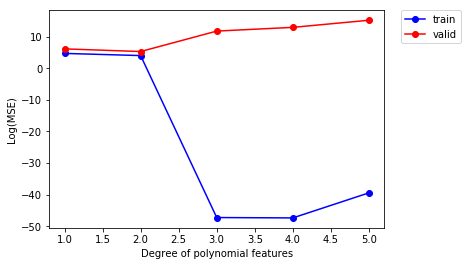

In [33]:
plot1 = plt.plot(deg_list, np.log(t_mse), '-ob', label = 'train')
plot2 = plt.plot(deg_list, np.log(v_mse), '-or', label = 'valid')
plt.ylabel("Log(MSE)")
plt.xlabel("Degree of polynomial features")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Elastic net regression
#### A combination of $L_1$ and $L_2$ regularization
##### $$\hat{\theta} = argmin_{\theta} ||y- X\theta||_2^2 + \lambda_1 ||\theta||_2^2 + \lambda_2||\theta||_1 $$


##### $$ \lambda_1 = \alpha * L_1\text{ ratio} $$
##### $$ \lambda_2 = 0.5 * \alpha  * (1 - L_1\text{ ratio} )$$

In [34]:
from sklearn.linear_model import ElasticNet

# Back to NBA data...
y_nba = nba_sals['wage']
x_nba = nba_sals.drop('wage', axis = 1)

In [35]:
def elastic_net(x, y, alph = 0.1, l1_ratio = 0.8):
    # Add a bias term to the dataset
    x, y = np.array(x), np.array(y)
    x = sm.add_constant(x)

    # Split into training and validation set
    split = int(0.8*x.shape[0])
    x_train, x_val = x[0:split, ], x[split:, ]
    y_train, y_val = y[:split, ], y[split:, ]
    
    # Fit the elastic net regression model
    my_reg = ElasticNet(alpha = alph, l1_ratio = l1_ratio, 
                        max_iter = 1e5).fit(x_train, y_train)
    
    # Make predictions
    val_preds = my_reg.predict(x_val)
    train_preds = my_reg.predict(x_train)
    val_mse = mean_squared_error(y_val, val_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    print("Alpha:", alph, "\n", 
          "Train MSE:", train_mse, "\n", "Valid MSE:", val_mse) 
    
    return train_mse, val_mse

In [36]:
alph_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
t_mse, v_mse = [], []
for alph in alph_list:
    t, v = elastic_net(x_nba, y_nba, alph)
    t_mse.append(t)
    v_mse.append(v)

Alpha: 0.0001 
 Train MSE: 0.130137271914 
 Valid MSE: 0.186530119725
Alpha: 0.001 
 Train MSE: 0.130336424803 
 Valid MSE: 0.179052467891
Alpha: 0.01 
 Train MSE: 0.143130254567 
 Valid MSE: 0.149765232642
Alpha: 0.1 
 Train MSE: 0.182268974472 
 Valid MSE: 0.145469400494
Alpha: 0.2 
 Train MSE: 0.235395251771 
 Valid MSE: 0.173816680592
Alpha: 0.3 
 Train MSE: 0.31366241776 
 Valid MSE: 0.223099342774


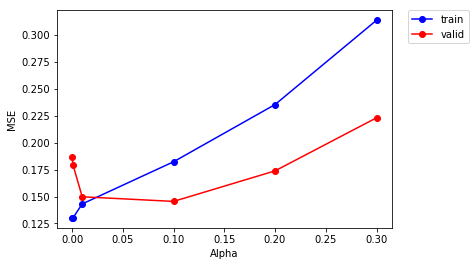

In [37]:
plot1 = plt.plot(alph_list, t_mse, '-ob', label = 'train')
plot2 = plt.plot(alph_list, v_mse, '-or', label = 'valid')
plt.ylabel("MSE")
plt.xlabel("Alpha")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()